In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/test_scores.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [11]:
data.nunique()

school               23
school_setting        3
school_type           2
classroom            97
teaching_method       2
n_student            18
student_id         2133
gender                2
lunch                 2
pretest              69
posttest             68
dtype: int64

In [5]:
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [6]:
data.describe(include='all')

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
count,2133,2133,2133,2133,2133,2133.000000,2133,2133,2133,2133.000000,2133.000000
unique,23,3,2,97,2,NaN,2133,2,2,NaN,NaN
top,GOOBU,Urban,Public,18K,Standard,NaN,PXW4K,Male,Does not qualify,NaN,NaN
freq,158,906,1582,31,1373,NaN,1,1077,1215,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,22.796531,NaN,NaN,NaN,54.955931,67.102203
std,NaN,NaN,NaN,NaN,NaN,4.228893,NaN,NaN,NaN,13.563101,13.986789
min,NaN,NaN,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,22.000000,32.000000
25%,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,44.000000,56.000000
50%,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,NaN,NaN,56.000000,68.000000
75%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,65.000000,77.000000


In [7]:
data.isna().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

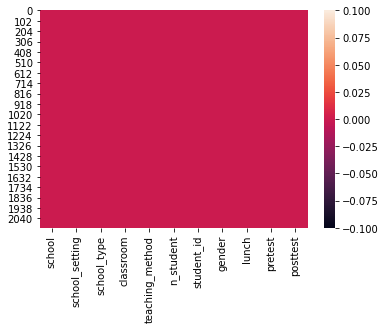

In [8]:
#checking missing values
sns.heatmap(data=data.isnull())

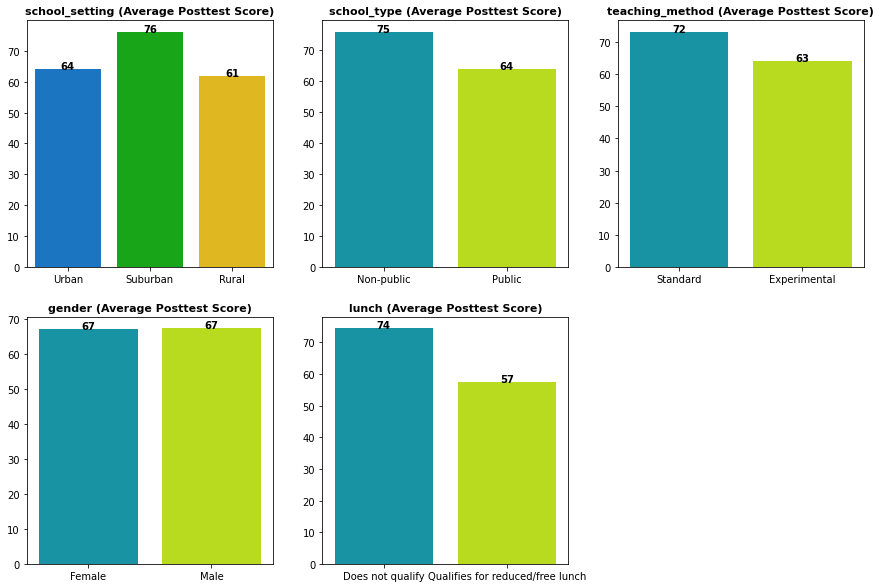

In [9]:
slist = ['school_setting', 'school_type', 'teaching_method', 'gender', 'lunch']
fig, ax = plt.subplots(2,3,figsize=(15,10))

def graph(x, i):
    sns.barplot(x=data[x].unique(), y=data.groupby(x)['posttest'].mean().values, ax=i, palette='nipy_spectral')
    i.set_title(x+' (Average Posttest Score)', fontsize=11, fontdict={"fontweight": "bold"})
    
    for p in i.patches:
        text = str(int(p.get_height()))
        i.annotate(text, (p.get_x()+p.get_width()/2, p.get_height()+1),
                   ha="center", va='center', fontsize=10, fontweight="bold")

graph('school_setting', ax[0,0])
graph('school_type', ax[0,1])
graph('teaching_method', ax[0,2])
graph('gender', ax[1,0])
graph('lunch', ax[1,1])
fig.delaxes(ax= ax[1,2]) 

number of students in the class is inversely proportional to the average posttest score

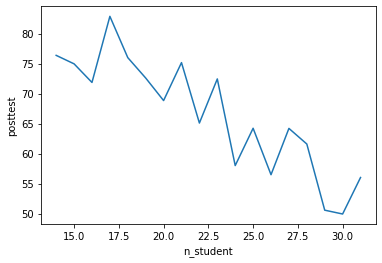

In [10]:
sns.lineplot(x=data.groupby('n_student')['posttest'].mean().index, 
             y=data.groupby('n_student')['posttest'].mean())

Feature to Feature Correlations - Higher value indicates simillarity of both two features. Therefore, the less value the better.

Feature to Outcome Correlations - Higher value indicates the importance of feature

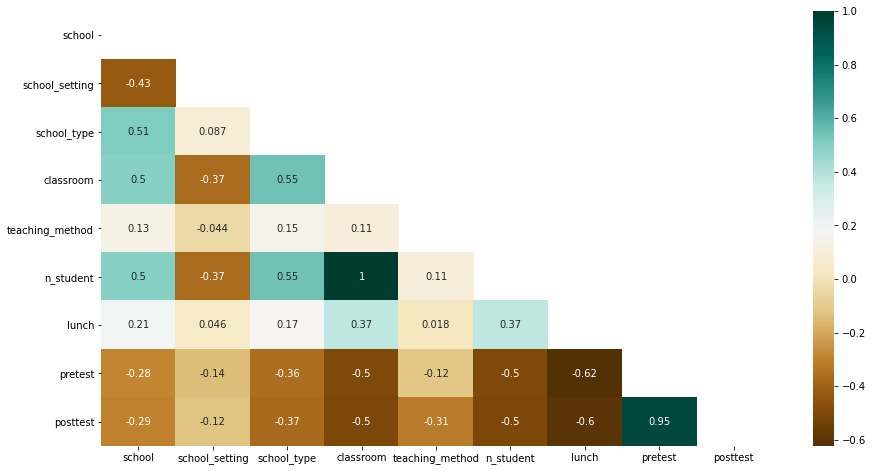

In [38]:
h_data = X.join(data['posttest'].to_frame())
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(h_data.corr(), dtype=np.bool))
sns.heatmap(data=h_data.corr(),annot=True,cmap='BrBG',mask=mask)

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
X = data.drop(['student_id', 'gender', 'posttest'], axis=1)

In [15]:
y = data['posttest']
X.head(),y.head()

(  school school_setting school_type  ... n_student             lunch  pretest
 0  ANKYI          Urban  Non-public  ...      20.0  Does not qualify     62.0
 1  ANKYI          Urban  Non-public  ...      20.0  Does not qualify     66.0
 2  ANKYI          Urban  Non-public  ...      20.0  Does not qualify     64.0
 3  ANKYI          Urban  Non-public  ...      20.0  Does not qualify     61.0
 4  ANKYI          Urban  Non-public  ...      20.0  Does not qualify     64.0
 
 [5 rows x 8 columns], 0    72.0
 1    79.0
 2    76.0
 3    77.0
 4    76.0
 Name: posttest, dtype: float64)

In [16]:
b_list = ['school_setting', 'school_type', 'teaching_method', 'lunch']
b_encoder = preprocessing.LabelBinarizer()
for x in b_list:
    a = b_encoder.fit_transform(X[x])
    X[x] = a
X.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,lunch,pretest
0,ANKYI,0,0,6OL,1,20.0,0,62.0
1,ANKYI,0,0,6OL,1,20.0,0,66.0
2,ANKYI,0,0,6OL,1,20.0,0,64.0
3,ANKYI,0,0,6OL,1,20.0,0,61.0
4,ANKYI,0,0,6OL,1,20.0,0,64.0


In [17]:
scale_col = ['n_student', 'pretest']
for l in scale_col:
    sc = StandardScaler()
    scaled_X = sc.fit_transform(asarray(X[l]).reshape(-1,1))
    X[l] = scaled_X
X.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,lunch,pretest
0,ANKYI,0,0,6OL,1,-0.661447,0,0.519477
1,ANKYI,0,0,6OL,1,-0.661447,0,0.814464
2,ANKYI,0,0,6OL,1,-0.661447,0,0.666971
3,ANKYI,0,0,6OL,1,-0.661447,0,0.445730
4,ANKYI,0,0,6OL,1,-0.661447,0,0.666971


In [18]:
f_list = ['school', 'classroom']
for x in f_list:
    encoding = X.groupby(x).size()
    encoding = encoding/len(X)
    X[x] = X[x].map(encoding)

X.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,lunch,pretest
0,0.019222,0,0,0.009376,1,-0.661447,0,0.519477
1,0.019222,0,0,0.009376,1,-0.661447,0,0.814464
2,0.019222,0,0,0.009376,1,-0.661447,0,0.666971
3,0.019222,0,0,0.009376,1,-0.661447,0,0.445730
4,0.019222,0,0,0.009376,1,-0.661447,0,0.666971


<h2> Creating Model

In [22]:
from sklearn.linear_model import LinearRegression,LogisticRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, roc_curve, roc_auc_score, r2_score, mean_squared_error
from sklearn import metrics

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [36]:
models = {
    "Linear Regression": LinearRegression(fit_intercept=True),
    "KNN": KNeighborsRegressor(),
    "XGbr":XGBRegressor(),
    "SGD": SGDRegressor(),
    "Decisiontree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(max_features='sqrt', random_state=5),
    "LogisticRegression": LogisticRegression()
}

for model in models.items():
    m = model[1]
    m.fit(X_train, y_train)
    pred1 = m.predict(X_test)
    print(model[0])
    print("Score: ", m.score(X_test,y_test))
    mae1 = mean_absolute_error(y_test, pred1)
    mse1 = mean_squared_error(y_test, pred1)
    print('MAE: {:.2f} \nMSE: {:.2f}'.format( mae1, mse1))
    print("")

Linear Regression
Score:  0.9488917003203031
MAE: 2.53 
MSE: 10.16

KNN
Score:  0.9482671812584661
MAE: 2.50 
MSE: 10.29

[15:29:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGbr
Score:  0.9509236604564064
MAE: 2.47 
MSE: 9.76

SGD
Score:  0.9488402079776442
MAE: 2.53 
MSE: 10.17

Decisiontree
Score:  0.9272406533807277
MAE: 2.97 
MSE: 14.47

RandomForest
Score:  0.9492954064871557
MAE: 2.48 
MSE: 10.08

LogisticRegression
Score:  0.1046875
MAE: 3.48 
MSE: 20.36

